# Urban Datasets

In [1]:
import numpy as np
import pandas as pd

np.random.seed(2024)

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import sys
sys.path.append('../..')

from topomap.visualizations import plot_topomap_comparison_highlight, plot_hierarchical_treemap, plot_icicle

from topomap import TopoTree
from topomap import TopoMap
from topomap import HierarchicalTopoMap

## Times Square

In [2]:
location = 'TimesSquare'
features = ['taxi-ct-'+location,
            'taxi-fare-'+location,
            'taxi-dist-'+location
            ]
features_names = ['Taxi Count', 'Taxi Fare', 'Taxi Distance']

prec = pd.read_csv('../../data/topomap-data/precipitation.csv')
prec = prec.set_index('datetime')
temp = pd.read_csv('../../data/topomap-data/temperature.csv')
temp = temp.set_index('datetime')
wind = pd.read_csv('../../data/topomap-data/wind.csv')
wind = wind.set_index('datetime')

df_times = pd.DataFrame()
df_times['Precipitation'] = prec
df_times['Temperature'] = temp
df_times['Wind'] = wind

for i, feature in enumerate(features):
    array = np.loadtxt(open(f'../../data/topomap-data/{feature}.txt', 'rb'))
    df_times[features_names[i]] = array

In [3]:
df_times.shape

(17520, 6)

In [4]:
df_times.head(30)

,Precipitation,Temperature,Wind,Taxi Count,Taxi Fare,Taxi Distance
datetime,,,,,,
1388552400,0.0,-2.925,7.70,0.000000,0.000000,0.000000
1388556000,0.0,-3.300,7.20,1.478398,18.073583,3.183412
1388559600,0.0,-3.300,5.65,0.489146,12.555073,2.341382
1388563200,0.0,-3.900,5.70,1.890726,13.541675,2.874270
1388566800,0.0,-3.900,5.10,12.127261,16.183768,3.851262
1388570400,0.0,-3.900,5.65,13.056059,21.618300,5.169585
1388574000,0.0,-3.900,5.10,14.409506,19.455797,4.865742
1388577600,0.0,-4.400,3.10,26.950547,13.816557,3.158765
1388581200,0.0,-4.150,2.85,33.653198,26.598768,6.943690


In [5]:
df_times.mean()

Precipitation     0.239888
Temperature      12.727316
Wind              4.961627
Taxi Count       69.054087
Taxi Fare        17.879119
Taxi Distance    13.020179
dtype: float64

In [6]:
times_data = df_times.values

In [8]:
topomap_times = TopoMap()
proj_topomap_times = topomap_times.fit_transform(times_data)

In [9]:
topotree_times = TopoTree(min_box_size=150)
topotree_times.mst = topomap_times.mst
topotree_times.sorted_edges = topomap_times.sorted_edges
comp_info_times = topotree_times.fit(times_data)

df_comp_times = pd.DataFrame.from_dict(comp_info_times)

df_comp_times

,id,size,points,persistence,created_at,children,parent,died_at,persistence_density
0,0,168,"[4220, 4483, 12766, 13821, 13822, 4792, 5562, ...",0.033490,1.295556,4,2.0,1.329046,126.406469
1,1,165,"[5170, 5605, 5097, 6495, 5579, 5028, 5266, 119...",0.009736,1.319310,2,2.0,1.329046,124.149211
2,2,2837,"[5170, 5605, 5097, 6495, 5579, 5028, 5266, 119...",0.279738,1.329046,370,4.0,1.608784,1763.444020
3,3,209,"[16644, 17153, 16810, 16044, 17013, 16689, 166...",0.060647,1.548137,11,4.0,1.608784,129.911808
4,4,4146,"[12766, 13821, 13822, 4792, 5562, 4578, 13631,...",0.103937,1.608784,294,7.0,1.712721,2420.709429
5,5,217,"[16102, 16270, 15552, 7533, 8010, 11300, 8849,...",0.065882,1.646840,11,7.0,1.712721,126.698974
6,6,593,"[13395, 13755, 4227, 4422, 13902, 4060, 5164, ...",0.239880,1.655189,74,13.0,1.895069,312.917413
7,7,4570,"[12766, 13821, 13822, 4792, 5562, 4578, 13631,...",0.018663,1.712721,60,9.0,1.731384,2639.506237
8,8,173,"[8313, 9015, 10688, 135, 1308, 7773, 1168, 224...",0.009192,1.722192,2,9.0,1.731384,99.920039
9,9,5162,"[16736, 16761, 10913, 10376, 17253, 354, 7592,...",0.041087,1.731384,138,11.0,1.772472,2912.317444


In [10]:
fig = plot_hierarchical_treemap(df_comp_times, color='died_at')
fig.update_layout(title='TopoTree - Times Square Dataset',
                  height=500,
                    width=600,)
fig.write_image("TreeMap-TimesSquare.png", scale=3)
fig.show()

In [11]:
topotree_times_small = TopoTree(min_box_size=50)
topotree_times_small.mst = topomap_times.mst
topotree_times_small.sorted_edges = topomap_times.sorted_edges
comp_info_times_small = topotree_times_small.fit(times_data)

df_comp_times_small = pd.DataFrame.from_dict(comp_info_times_small)

df_comp_times_small

,id,size,points,persistence,created_at,children,parent,died_at,persistence_density
0,0,165,"[14026, 14556, 4234, 4764, 5170, 5605, 5097, 6...",0.133862,1.195184,19,4.0,1.329046,124.149211
1,1,168,"[5129, 12863, 5037, 12600, 3908, 12043, 3360, ...",0.127660,1.201386,16,4.0,1.329046,126.406469
2,2,130,"[4292, 5563, 14472, 5305, 15022, 12983, 14925,...",0.111613,1.244479,20,7.0,1.356093,95.863666
3,3,133,"[13978, 13979, 13163, 13142, 13402, 13977, 421...",0.131358,1.283286,20,8.0,1.414644,94.016582
4,4,369,"[5170, 5605, 5097, 6495, 5579, 5028, 5266, 119...",0.027047,1.329046,16,7.0,1.356093,272.105330
...,...,...,...,...,...,...,...,...,...
60,60,11013,"[12766, 13821, 13822, 4792, 5562, 4578, 13631,...",0.030658,2.076273,117,63.0,2.106930,5227.035747
61,61,52,"[7963, 10607, 9168, 8483, 10003, 10654, 1435, ...",0.055733,2.085632,2,64.0,2.141366,24.283568
62,62,69,"[10122, 10123, 884, 9646, 9430, 922, 923, 883,...",0.018759,2.088172,3,63.0,2.106930,32.749066
63,63,11423,"[10122, 10123, 884, 9646, 9430, 922, 923, 883,...",0.034435,2.106930,155,64.0,2.141366,5334.446132


In [12]:
edge_lentghs = [e[2] for e in topomap_times.sorted_edges]
hiertopomap_times = HierarchicalTopoMap(max_edge_length=edge_lentghs[int(0.995*len(edge_lentghs))],
                                        k_components=15)
hiertopomap_times.min_points_component = topotree_times.min_box_size
hiertopomap_times.mst = topomap_times.mst
hiertopomap_times.sorted_edges = topomap_times.sorted_edges
proj_hier_times = hiertopomap_times.fit_transform(times_data)

Scalling component 1 - Scalar: 20.000 - initial area: 768.271... final area: 307308.531.
Scalling component 0 - Scalar: 20.000 - initial area: 681.853... final area: 272741.219.
Scalling component 3 - Scalar: 18.292 - initial area: 1606.861... final area: 537622.125.
Scalling component 5 - Scalar: 16.845 - initial area: 2024.864... final area: 574553.938.
Scalling component 8 - Scalar: 17.162 - initial area: 1157.631... final area: 340967.719.
Scalling component 10 - Scalar: 16.464 - initial area: 1774.109... final area: 480882.688.
Scalling component 6 - Scalar: 16.021 - initial area: 9673.135... final area: 2482745.500.
Scalling component 12 - Scalar: 15.325 - initial area: 3898.812... final area: 915703.375.
Scalling component 15 - Scalar: 13.614 - initial area: 2728.781... final area: 505734.938.
[INFO] Max edge length hit. Distance: 6.636089352313177 | max_edge_length: 6.621668785614173


In [13]:
components_to_highligth = hiertopomap_times.components_to_scale

fig = plot_topomap_comparison_highlight(proj_topomap_times, proj_hier_times, 
                                        components_to_highligth, df_comp_times)
fig.update_layout(title='Times Square Dataset', 
                  xaxis=dict(range=[-1800, 1600],showticklabels=False), 
                  yaxis=dict(range=[19950,23500],showticklabels=False),
                    height=600,
                    width=1200,
                  )
fig.write_image("Comparison-TimesSquare.png", scale=3)
fig.show()

In [14]:
df = df_times.copy()

df = df.reset_index()

df['Component'] = -1
for c in components_to_highligth:
    points_id = df_comp_times.loc[c,'points']
    for i in points_id:
        df.loc[i,'Component'] = c

In [15]:
df['Component'].unique()

array([-1, 15, 12,  8,  5,  3,  6, 10,  1,  0], dtype=int64)

In [16]:
df.shape

(17520, 8)

In [17]:
proj_topomap_times.shape

(17520, 2)

In [18]:
df_times['Date'] = (pd.to_timedelta(df_times.index, unit='s') + pd.to_datetime('1970-1-1')) 
df_times['Date'] = df_times['Date'].dt.tz_localize("UTC").dt.tz_convert('US/Eastern')
df_times['Quarter'] = pd.DatetimeIndex(df_times['Date']).quarter
df_times['Month'] = pd.DatetimeIndex(df_times['Date']).month
df_times['Weekday'] = pd.DatetimeIndex(df_times['Date']).weekday
df_times['Hour'] = pd.DatetimeIndex(df_times['Date']).hour

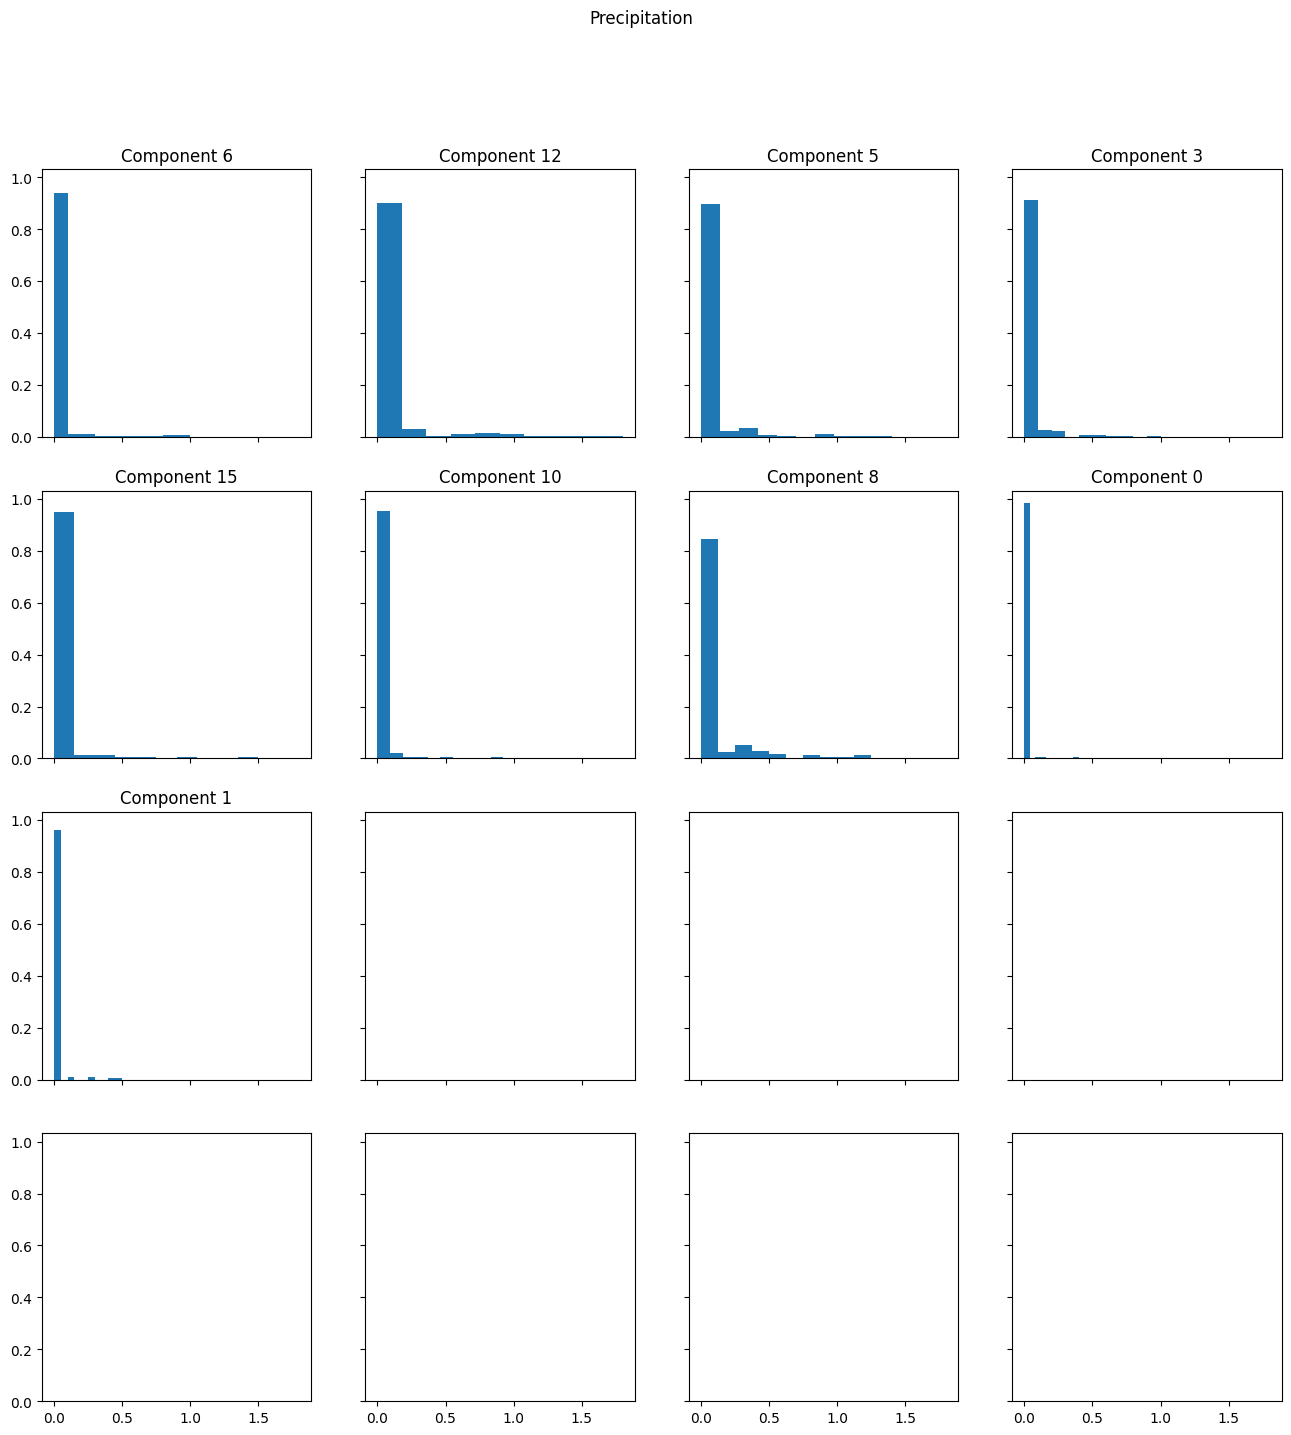

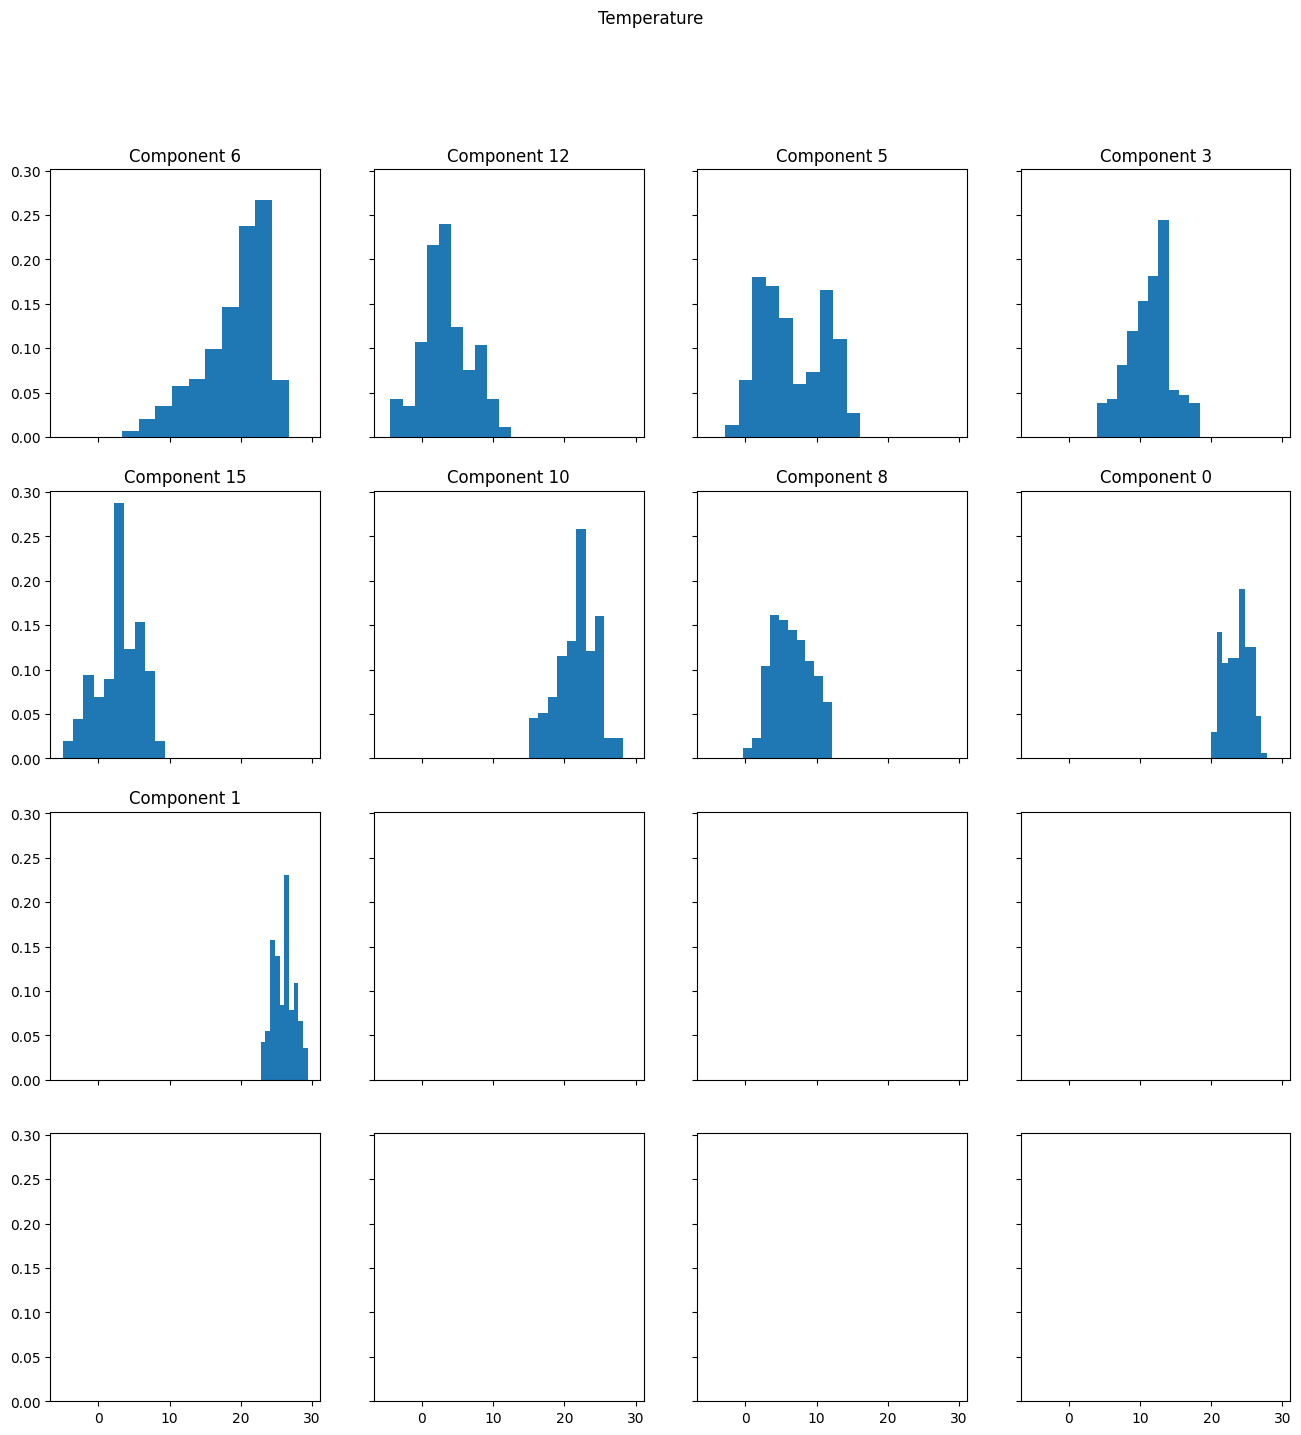

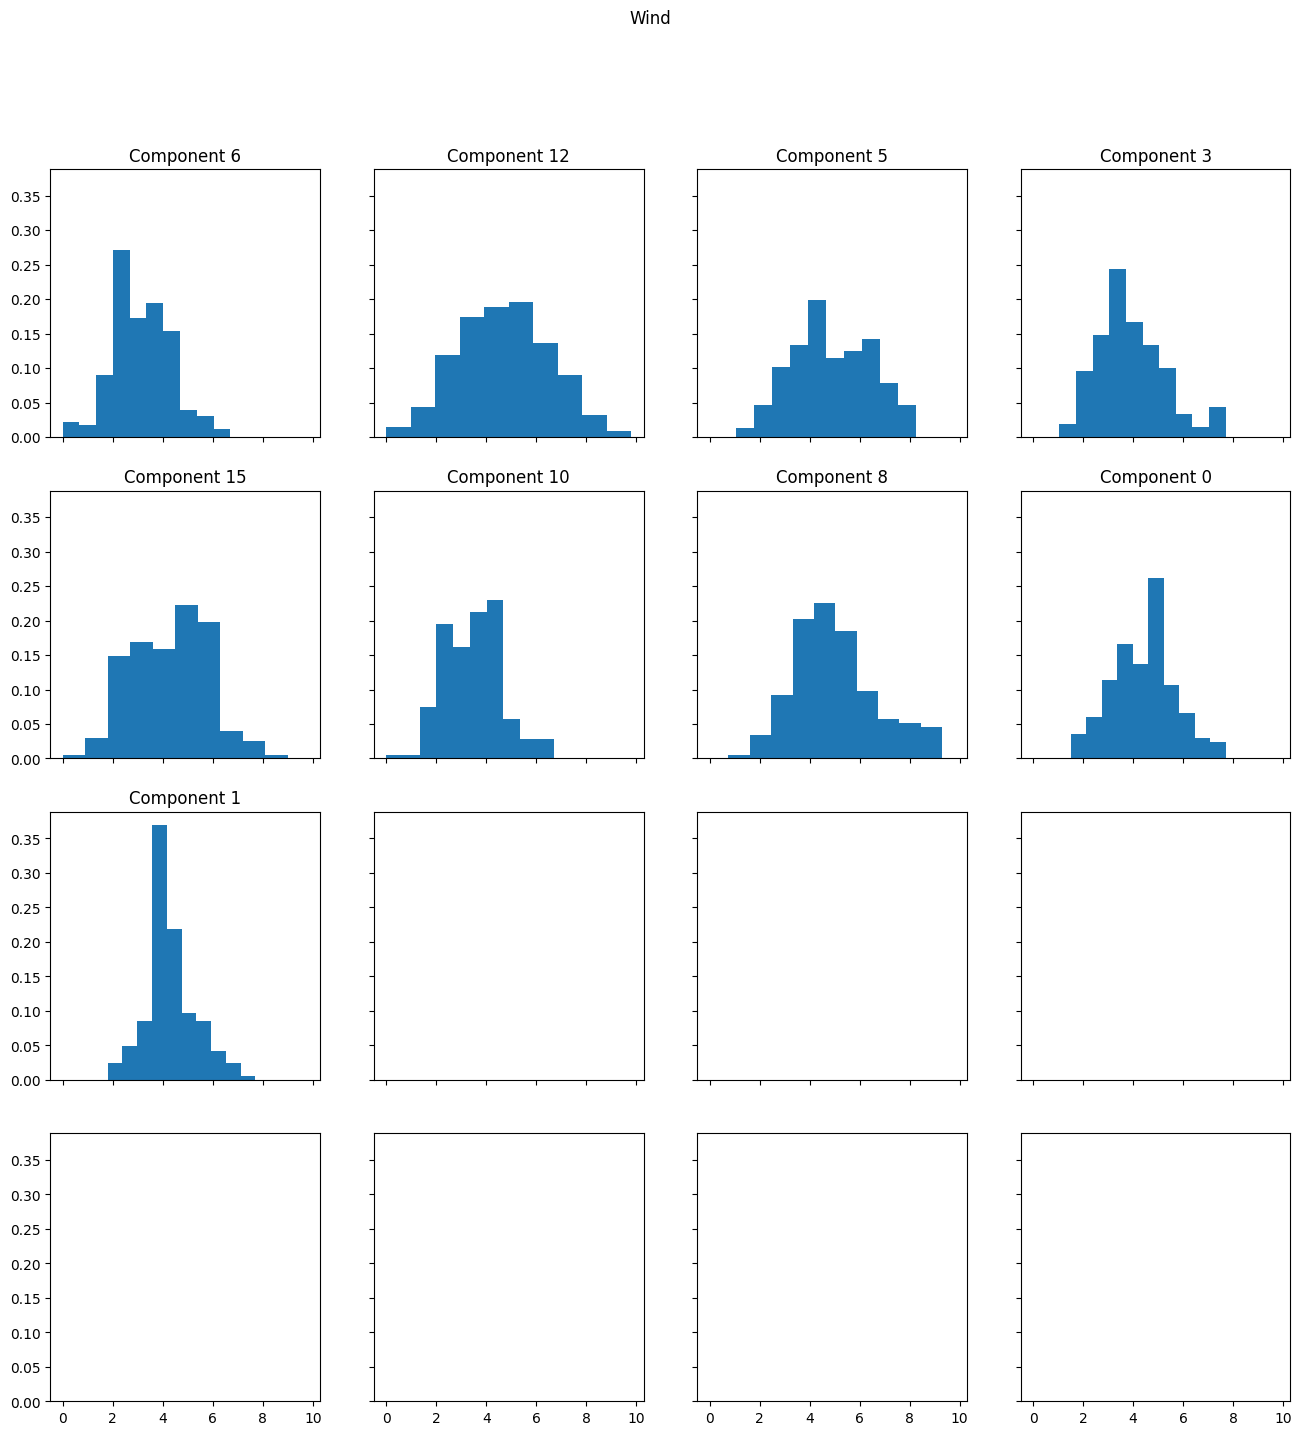

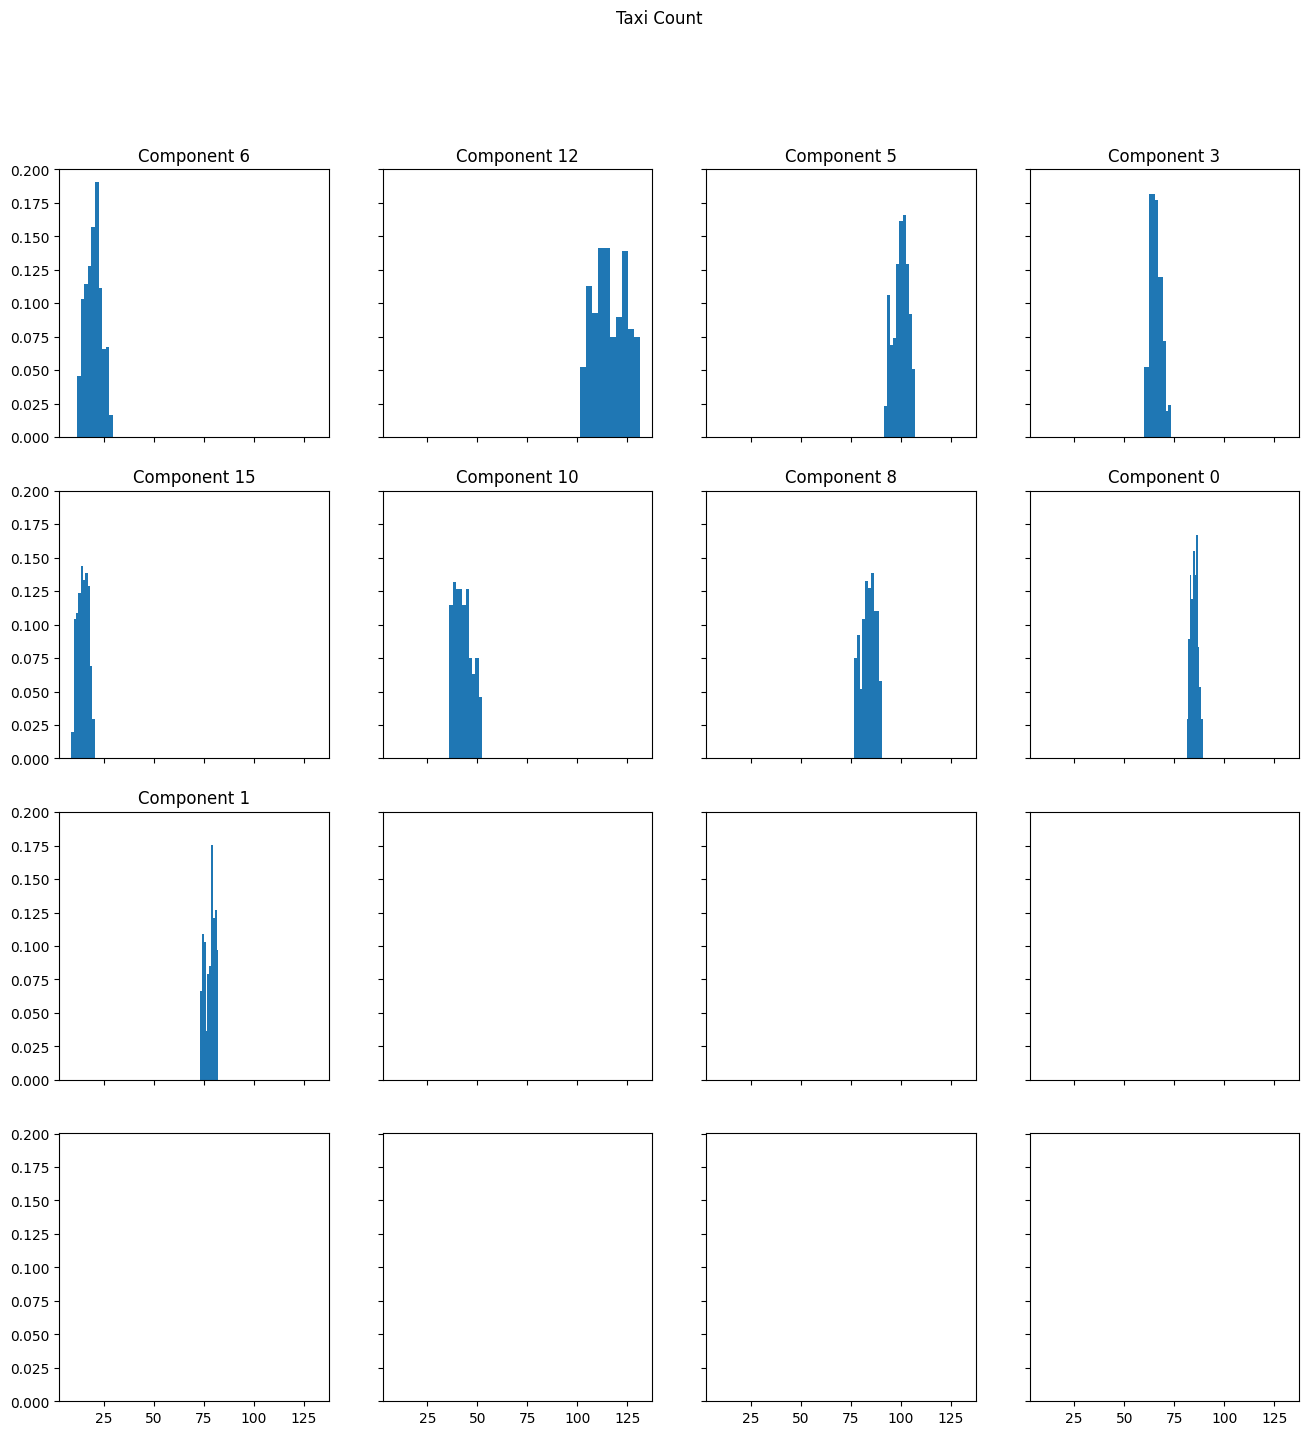

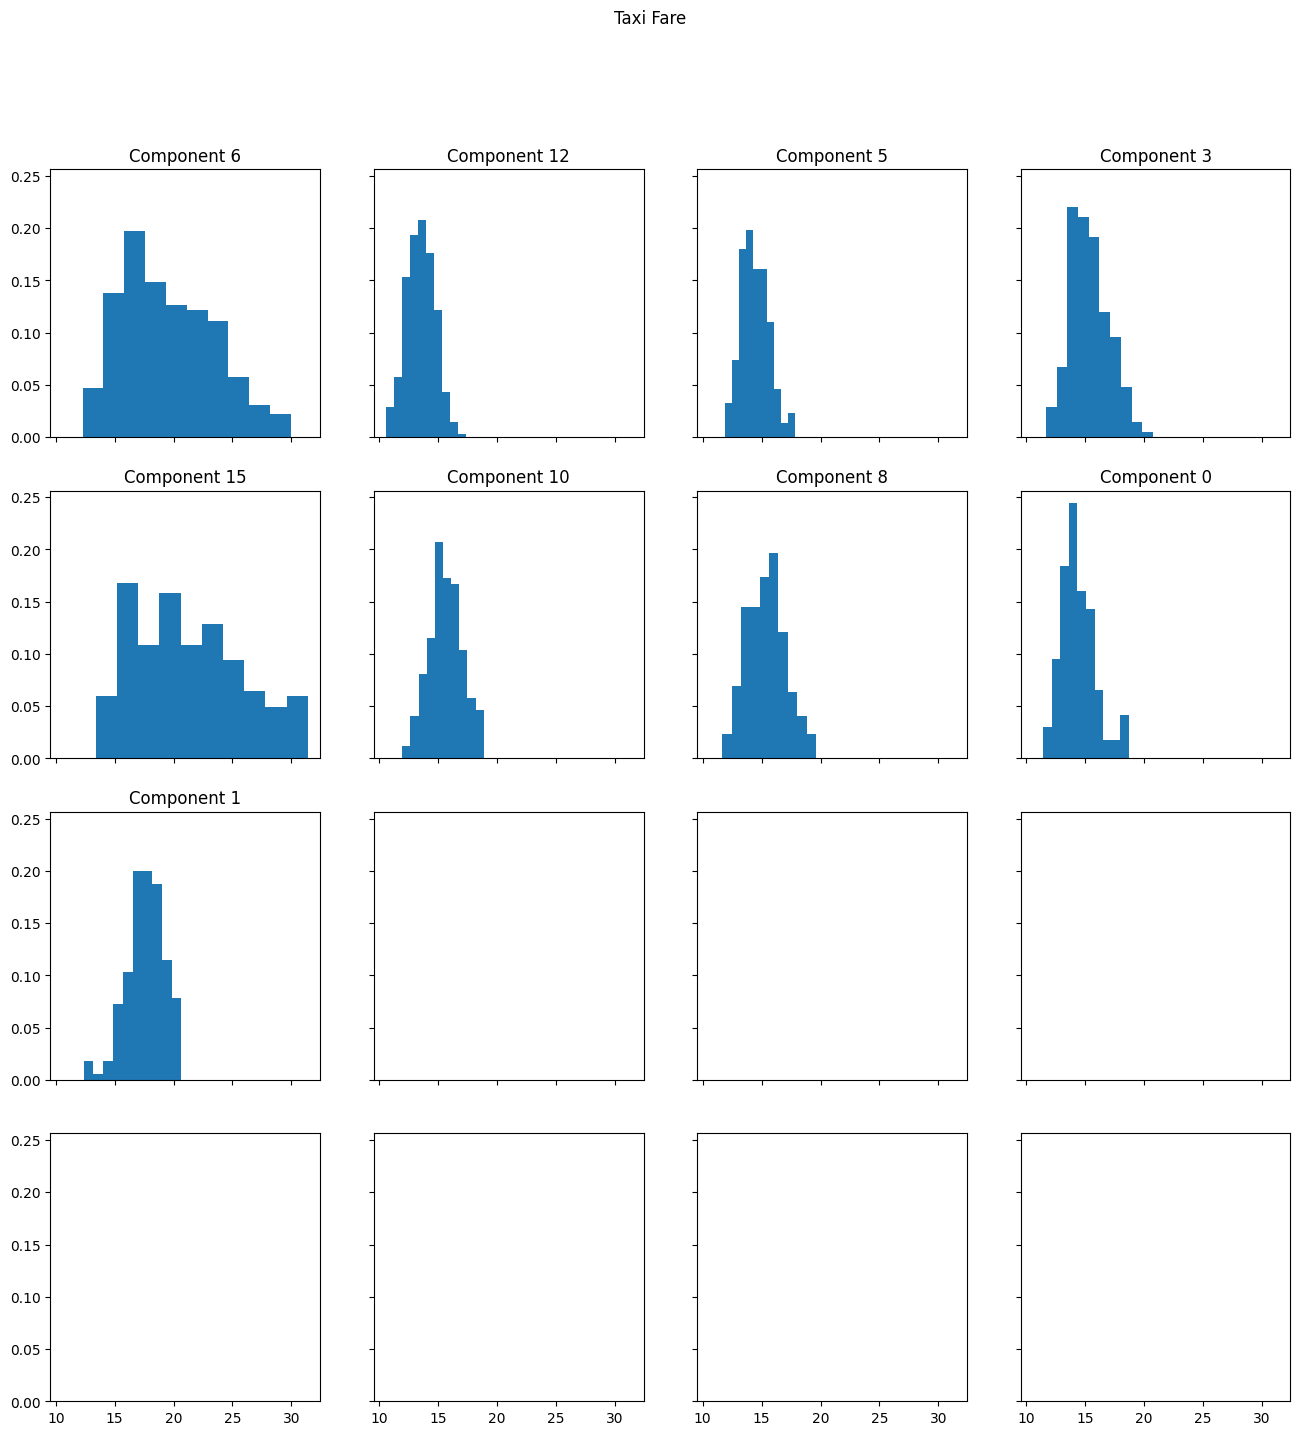

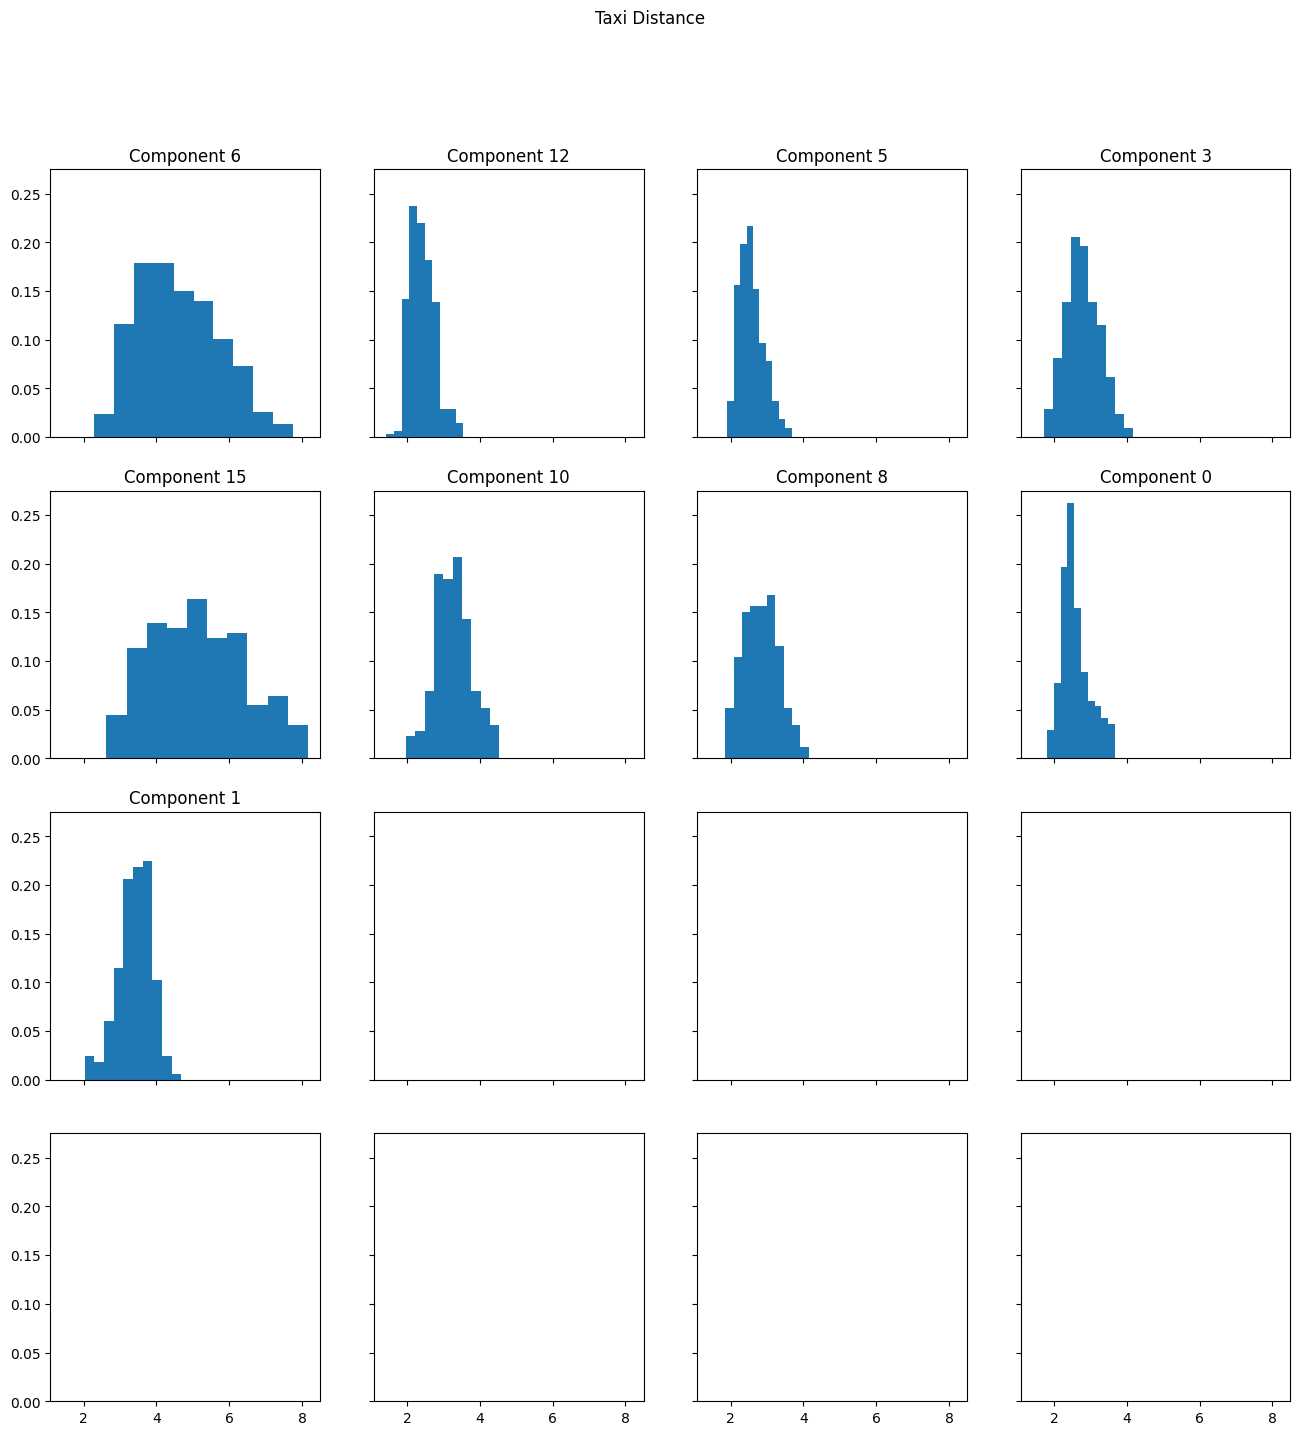

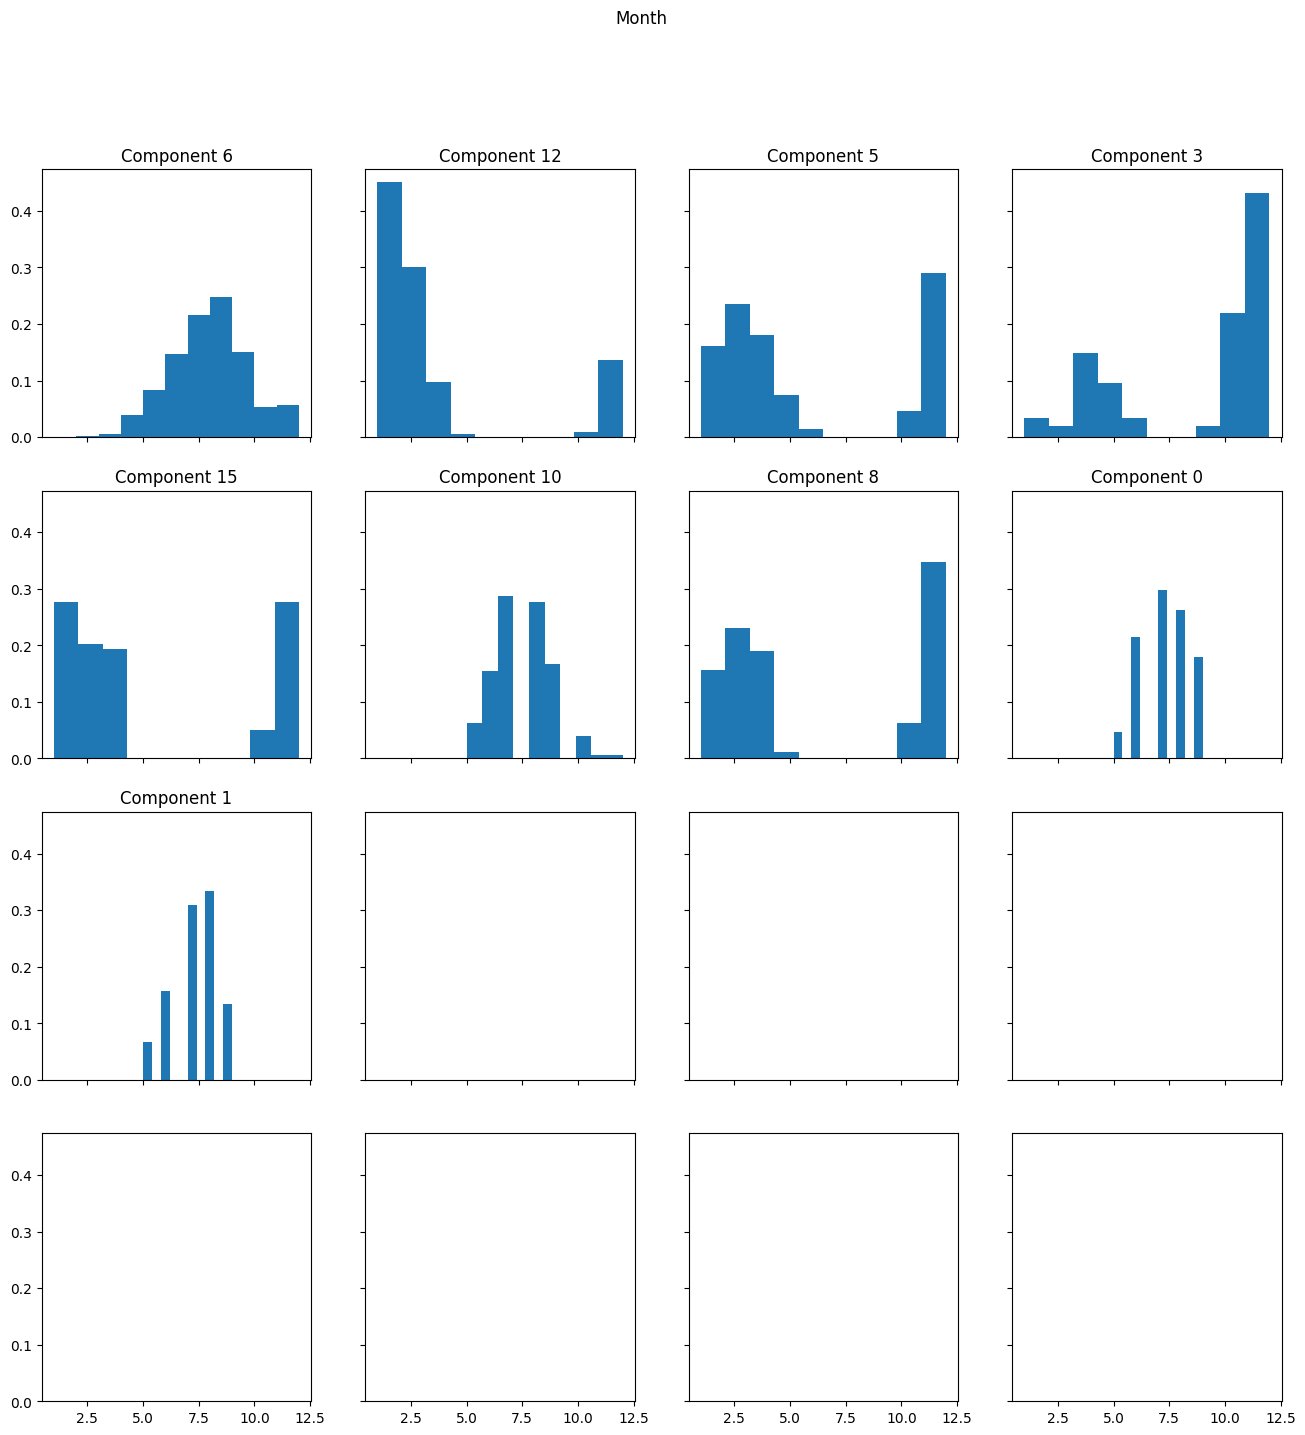

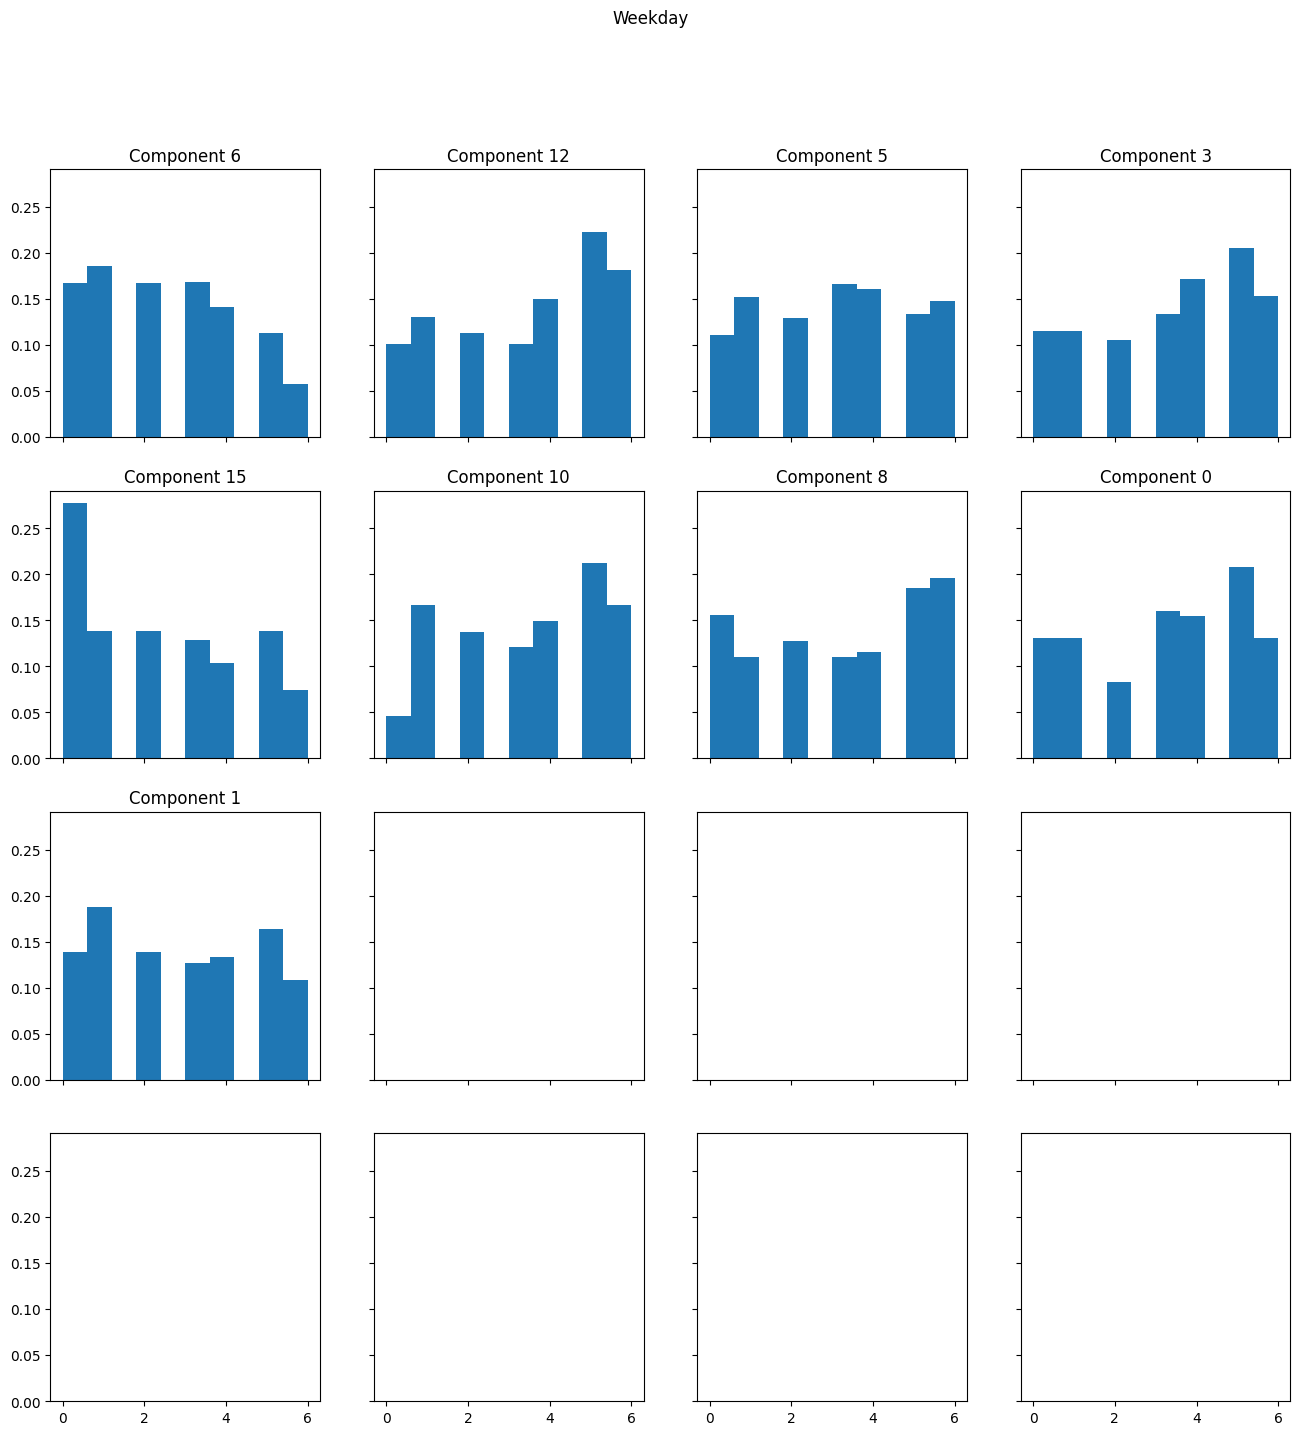

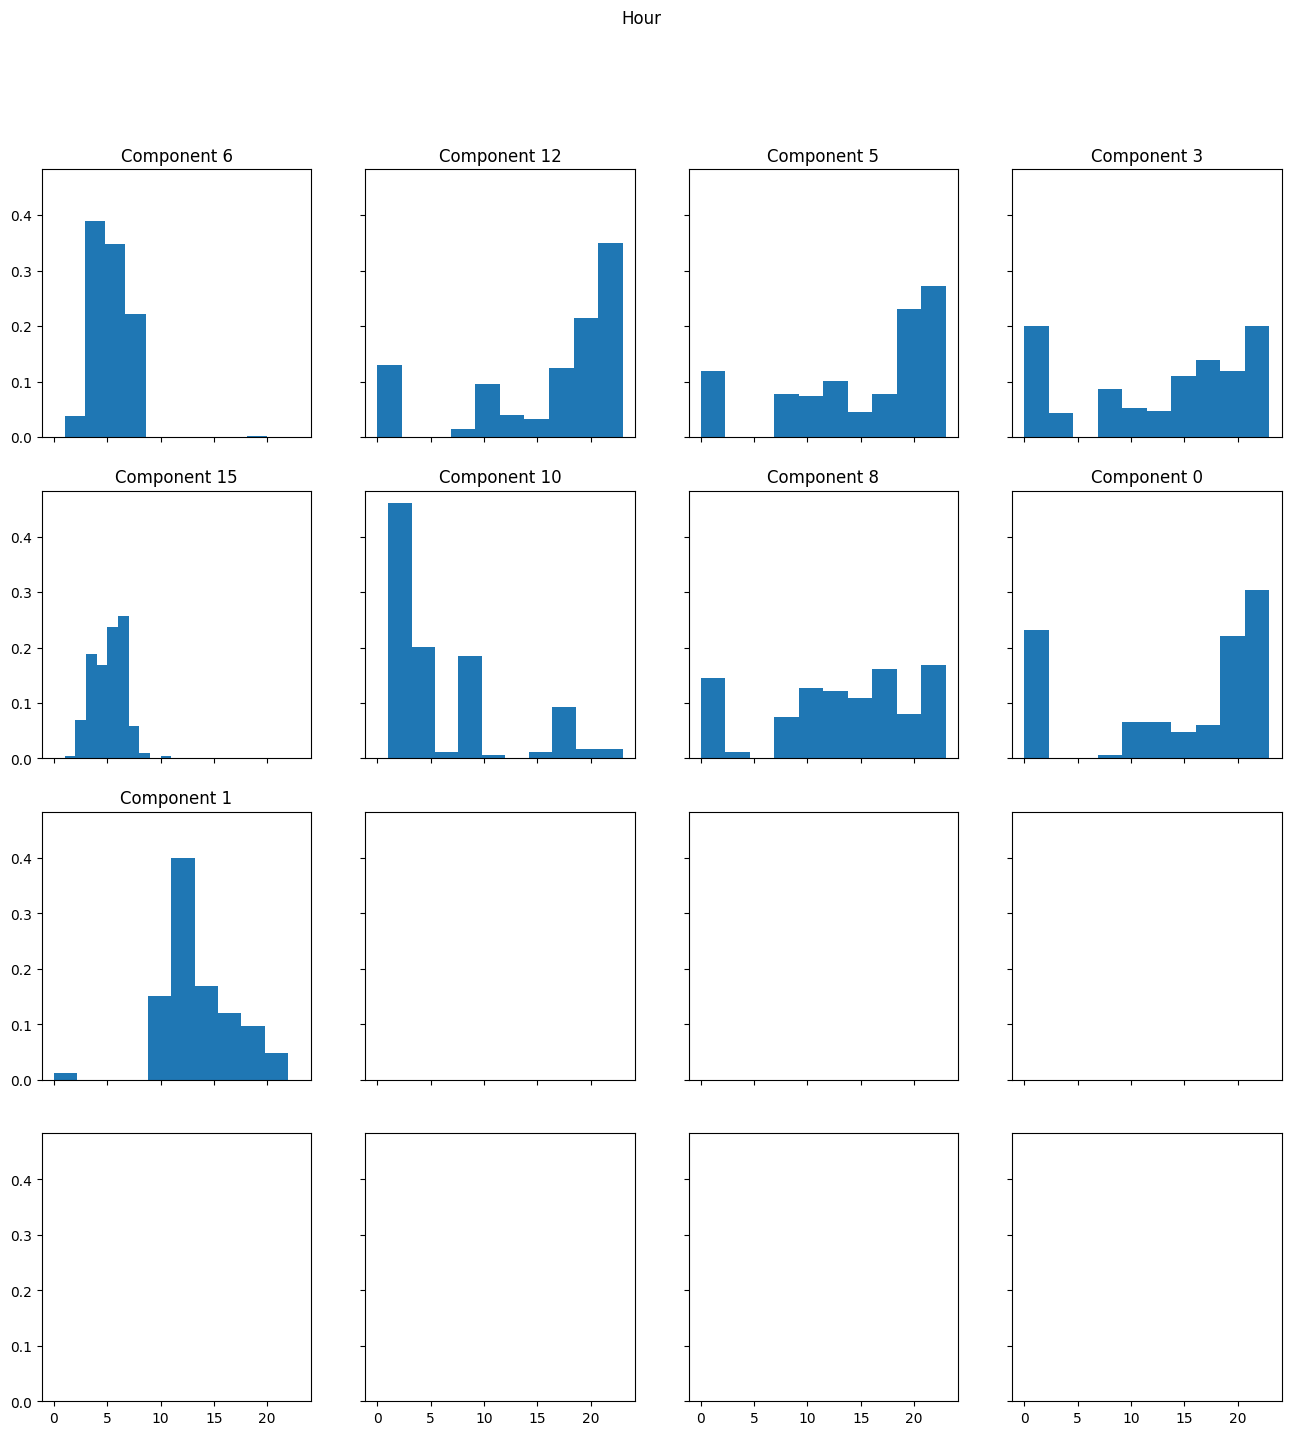

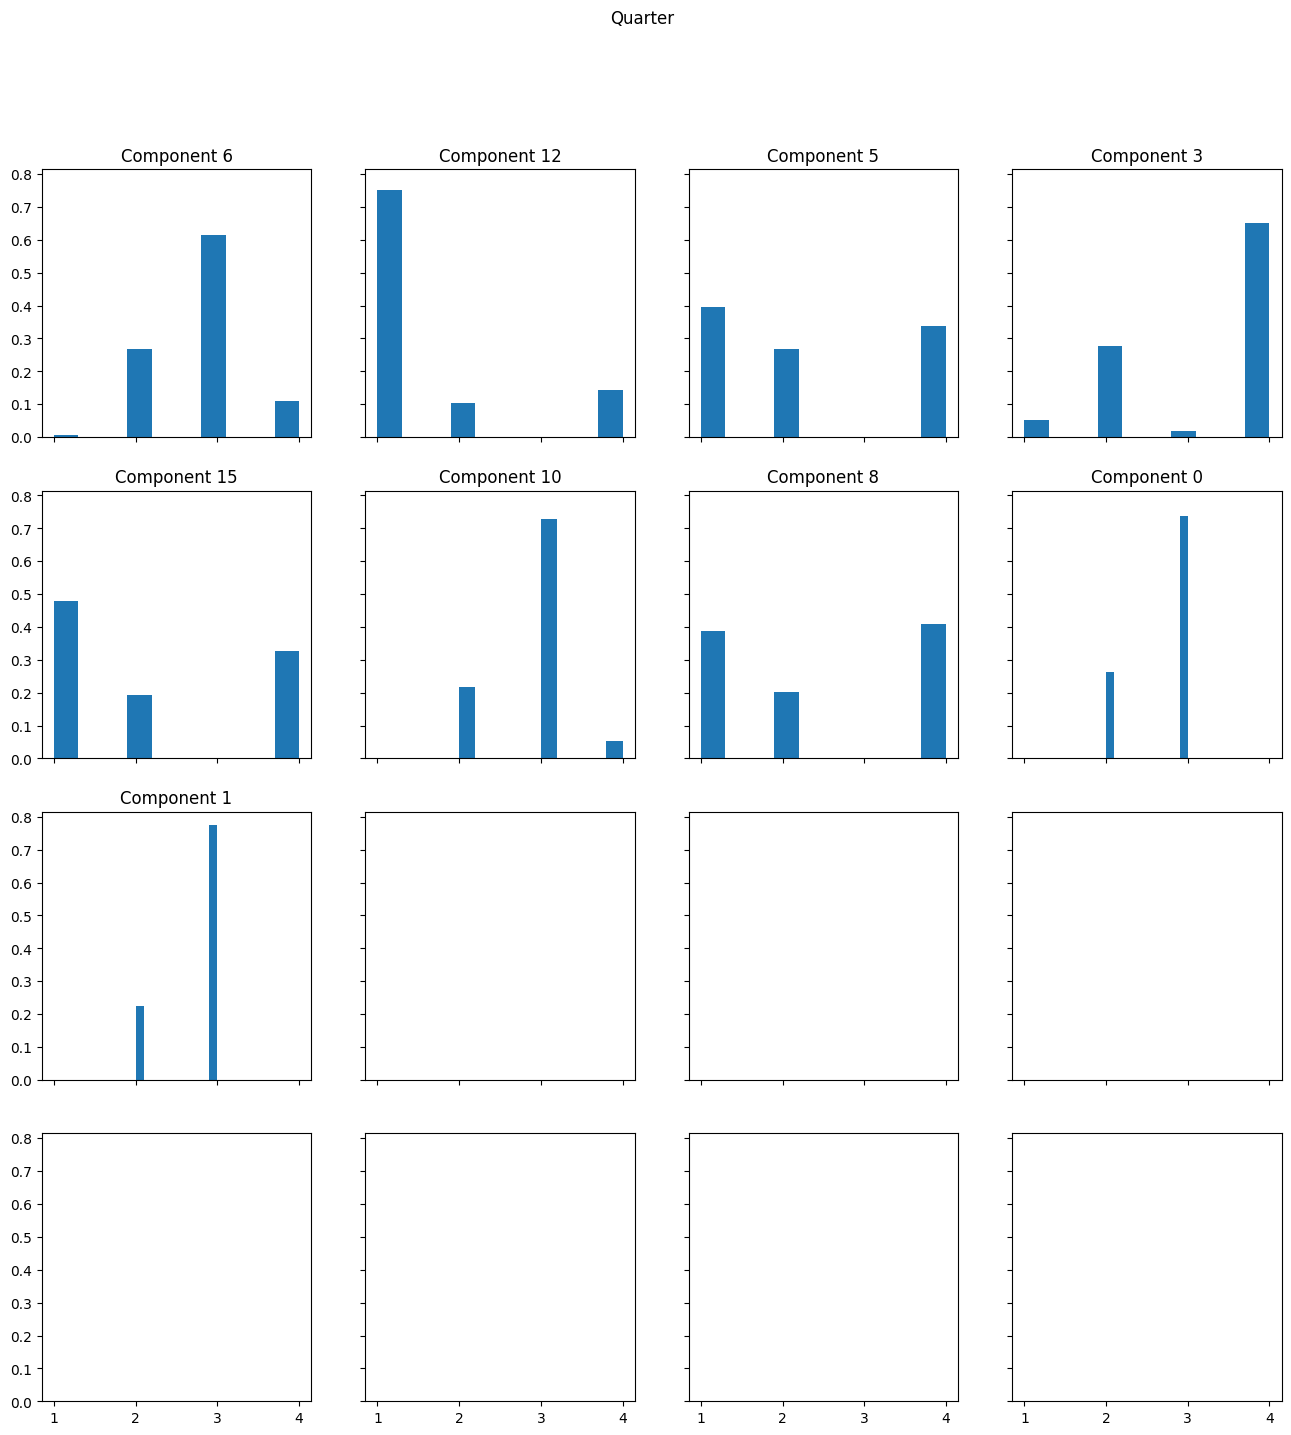

In [19]:
features = ['Precipitation','Temperature','Wind','Taxi Count','Taxi Fare','Taxi Distance','Month','Weekday','Hour','Quarter']

for f in features:
    fig, axs = plt.subplots(4, 4, figsize=(16,16), sharex=True, sharey=True)
    ix, iy = 0, 0
    for i,c in enumerate(components_to_highligth):
        ix = i%4
        iy = i//4
        data = df_times.iloc[df_comp_times.loc[c,'points']][f].to_list()
        axs[iy,ix].hist(data,
                    weights=np.ones(len(data)) / len(data))
        axs[iy,ix].set_title(f'Component {c}')

    fig.suptitle(f)

Component 6


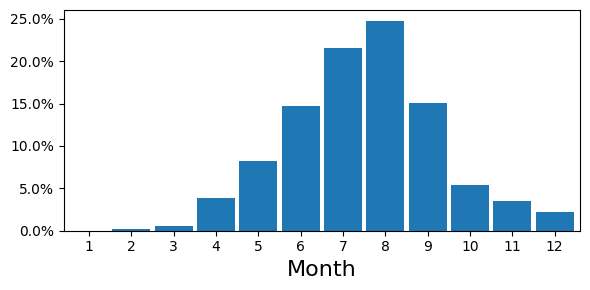

Component 12


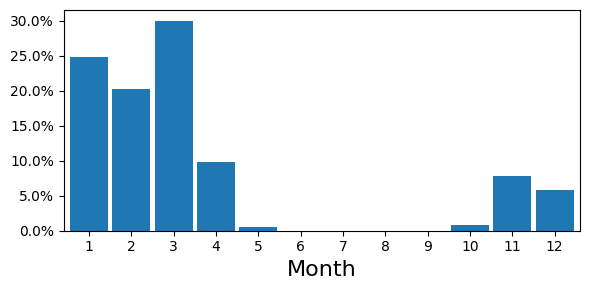

Component 5


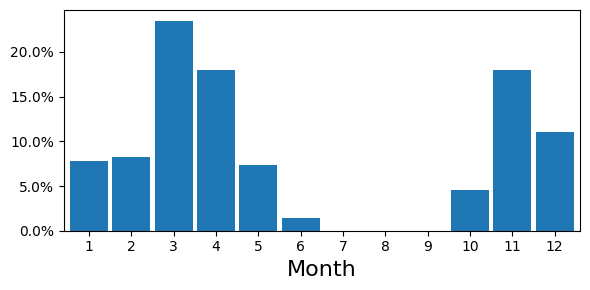

Component 3


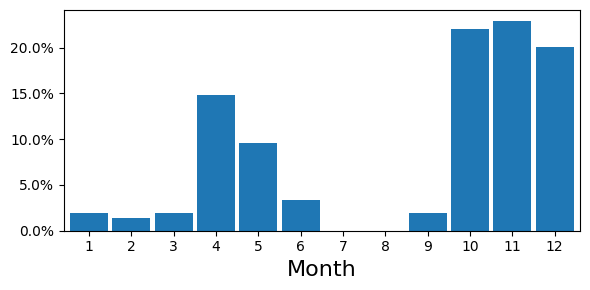

Component 15


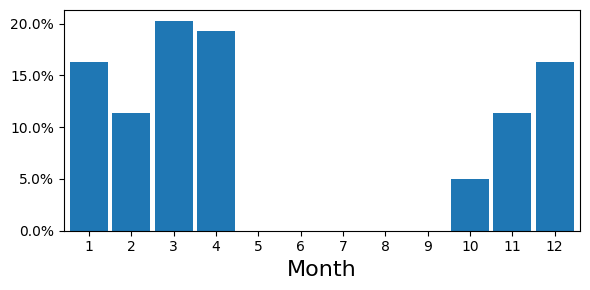

Component 10


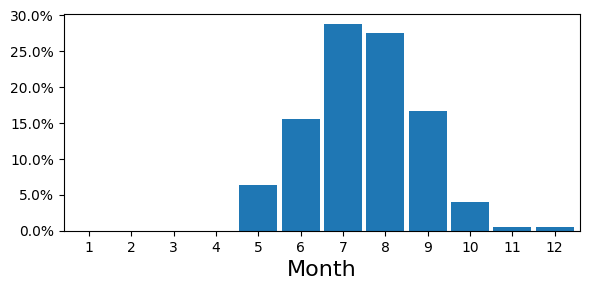

Component 8


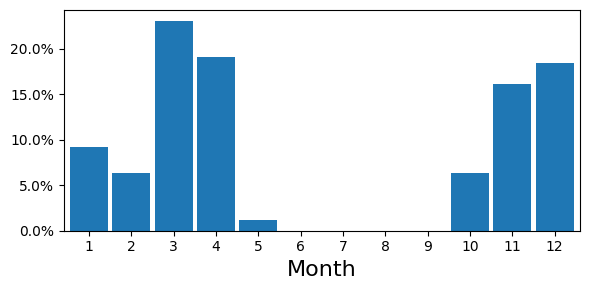

Component 0


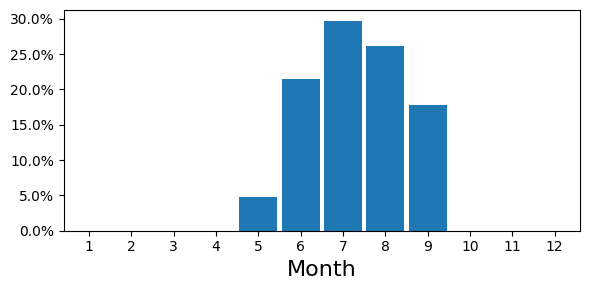

Component 1


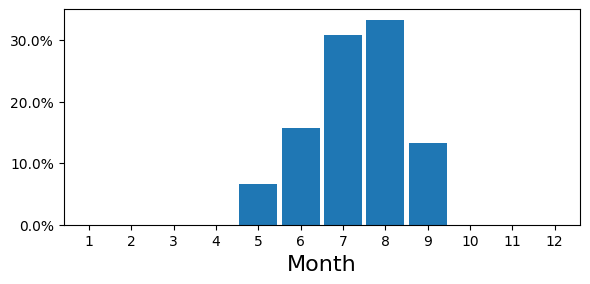

In [20]:
for component in components_to_highligth:
    data = df_times.iloc[df_comp_times.loc[component,'points']]['Month'].to_list()

    bins = [0.5+i for i in range(13)]

    fig, axs = plt.subplots(1, 1, figsize=(6,3))
    axs.hist(data, bins=bins, weights=np.ones(len(data)) / len(data), rwidth=0.9
            )
    axs.set_xlabel('Month', size=16)
    axs.set_xticks(list(range(1,13)))
    axs.set_xlim([0.4, 12.6])

    print(f'Component {component}')

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.savefig(f'Comp{component}-Month.png')
    plt.show()

Component 6


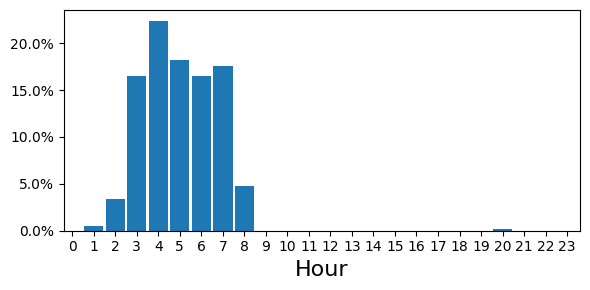

Component 12


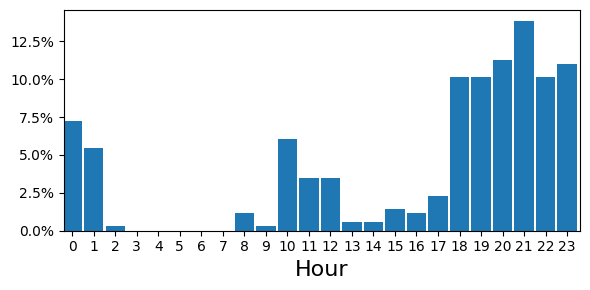

Component 5


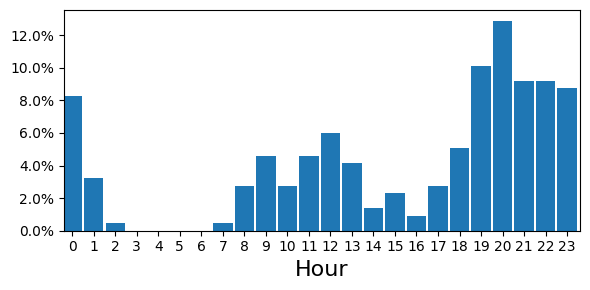

Component 3


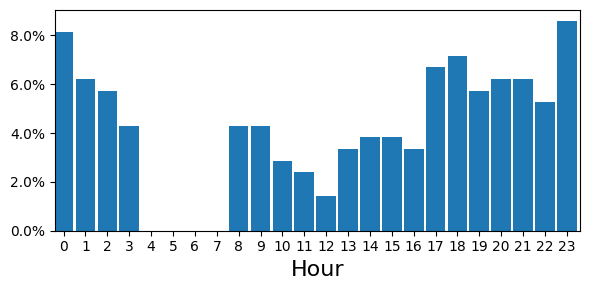

Component 15


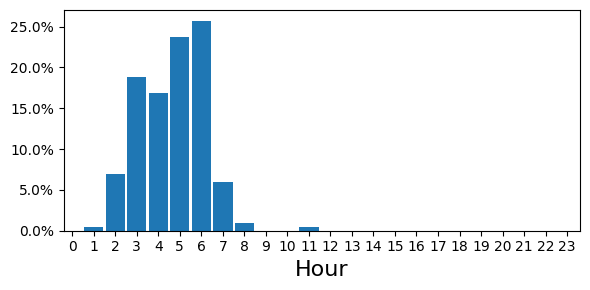

Component 10


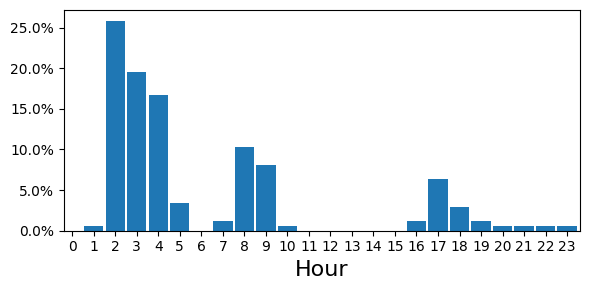

Component 8


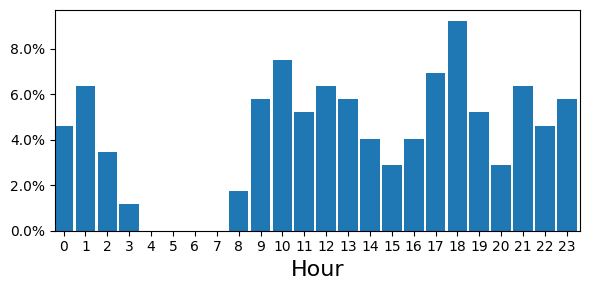

Component 0


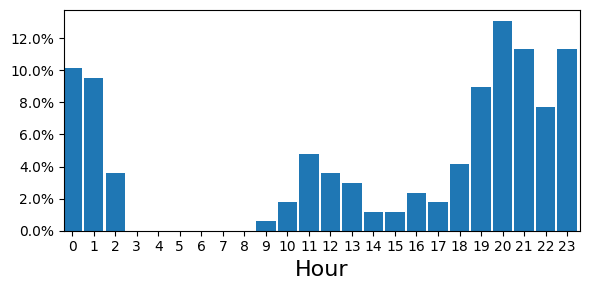

Component 1


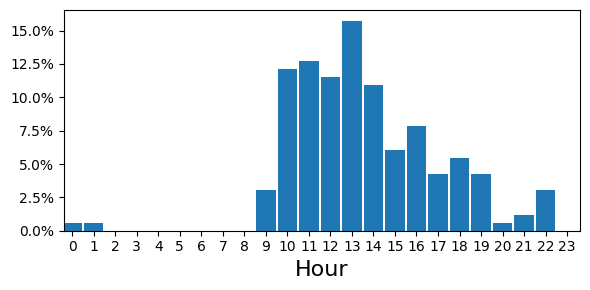

In [21]:
for component in components_to_highligth:
    data = df_times.iloc[df_comp_times.loc[component,'points']]['Hour'].to_list()

    bins = [i-0.5 for i in range(25)]

    fig, axs = plt.subplots(1, 1, figsize=(6,3))
    axs.hist(data, bins=bins, weights=np.ones(len(data)) / len(data), rwidth=0.9
            )
    axs.set_xlabel('Hour', size=16)
    axs.set_xticks(list(range(0,24)))
    axs.set_xlim([-0.4, 23.6])

    print(f'Component {component}')

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    plt.tight_layout()
    plt.savefig(f'Comp{component}-Hour.png')
    plt.show()

- **Component 2:** Warm months, waking hours -> *Match (b)+(c)*

- **Component 5:** Months 4-11, hours 2-8, Warm months, low taxi count, more expensive taxi fares (longer rides) -> *Match (f)*
- **Component 12:** Cold months, waking hours, high taxi count, cheap fares -> *Match (d)*
- **Component 6:** (A bit less) cold months, waking hours
- **Component 3:** Fall and spring, waking hours -> *Match (e)*
- **Component 15:** Months 10 ro 4 (cold), night, low taxi count, more expensive taxi fares (longer rides)
- **Component 10:** Warm months, night
- **Component 8:** Cold months, waking hours, a bit of rain